In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import r2_score,roc_auc_score,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE,ADASYN
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.neighbors import LocalOutlierFactor
from vecstack import stacking
from mlxtend.classifier import StackingClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
from scipy.stats import pearsonr

In [2]:
class XGBoostClassifier():
    def __init__(self,num_boost_round=10,**params):
        self.clf=None
        self.num_boost_round=num_boost_round
        self.classes_=[0,1]
        self.params=params
        self.params.update({'objective':"multi:softprob"}) 
    def classes_(self):
        l=[0,1]
        return l
    def fit(self,X,y,num_boost_round=None):
        num_boost_round=num_boost_round or self.num_boost_round
        self.label2num=dict((label,i) for i,label in enumerate(sorted(set(y))))
        dtrain=xgb.DMatrix(X,label=[self.label2num[label] for label in y])
        self.clf=xgb.train(params=self.params,dtrain=dtrain,num_boost_round=num_boost_round)
    def predict(self,X):
        num2label=dict((i,label)for label,i in self.label2num.items())
        Y=self.predict_proba(X)
        y=np.argmax(Y,axis=1)
        return np.array([num2label[i] for i in y])
    def predict_proba(self,X):
        dtest=xgb.DMatrix(X)
        return self.clf.predict(dtest)
    def score(self,X,y):
        Y=self.predict_proba(X)
        return 1/logless(y,Y)
    def get_params(self,deep=True):
        return self.params
    def set_params(self,**params):
        if 'num_boost_round' in params:
            self.num_boost_round=params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
                                            

In [3]:
pd.set_option('max_columns',260)

In [4]:
class XGBoostClassifier():
    def __init__(self,num_boost_round=10,**params):
        self.clf=None
        self.num_boost_round=num_boost_round
        self.classes_=[0,1]
        self.params=params
        self.params.update({'objective':"multi:softprob"}) 
    def classes_(self):
        l=[0,1]
        return l
    def fit(self,X,y,num_boost_round=None):
        num_boost_round=num_boost_round or self.num_boost_round
        self.label2num=dict((label,i) for i,label in enumerate(sorted(set(y))))
        dtrain=xgb.DMatrix(X,label=[self.label2num[label] for label in y])
        self.clf=xgb.train(params=self.params,dtrain=dtrain,num_boost_round=num_boost_round)
    def predict(self,X):
        num2label=dict((i,label)for label,i in self.label2num.items())
        Y=self.predict_proba(X)
        y=np.argmax(Y,axis=1)
        return np.array([num2label[i] for i in y])
    def predict_proba(self,X):
        dtest=xgb.DMatrix(X)
        return self.clf.predict(dtest)
    def score(self,X,y):
        Y=self.predict_proba(X)
        return 1/logless(y,Y)
    def get_params(self,deep=True):
        return self.params
    def set_params(self,**params):
        if 'num_boost_round' in params:
            self.num_boost_round=params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
                                            

In [5]:
train=pd.read_csv('/Users/shashank/Downloads/Societe2/train.csv')
test=pd.read_csv('/Users/shashank/Downloads/Societe2/test.csv')
sample=pd.read_csv('/Users/shashank/Downloads/Societe2/sample_submissions.csv')

In [6]:
target='target'
IDcol = 'transaction_id'


In [7]:
# ids=test['transaction_id']
# train.drop(['transaction_id'],axis=1,inplace=True)
# test.drop(['transaction_id'],axis=1,inplace=True)

In [8]:
# Y=train['target']
# train.drop(['target'],axis=1,inplace=True)

In [7]:
train.drop(['cat_var_1','cat_var_3','cat_var_6','cat_var_8'],axis=1,inplace=True)
test.drop(['cat_var_1','cat_var_3','cat_var_6','cat_var_8'],axis=1,inplace=True)

In [9]:
train.fillna('NO',inplace=True)
test.fillna('NO',inplace=True)

In [10]:
def encoder(df,cols):
    le=LabelEncoder()
    for i in cols:
        le.fit(df[i])
        df.loc[:,i]=le.transform(df[i])

In [14]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_20,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_25,cat_var_26,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_31,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,0,3,74,0,1,248,3,0,4,3,3,1,19,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,66,48,603,1,0,148,3,0,2,15,3,3,14,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,128,3,156,1,0,511,3,58,2,12,0,4,16,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,0,3,138,0,0,336,3,344,1,5,3,1,3,11,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,66,48,605,1,0,148,3,0,1,20,2,3,14,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
encoder(train,train.columns[8:26])
encoder(test,train.columns[8:26])

In [15]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_20,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_25,cat_var_26,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_31,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,0,3,74,0,1,248,3,0,4,3,3,1,19,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,66,48,603,1,0,148,3,0,2,15,3,3,14,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,128,3,156,1,0,511,3,58,2,12,0,4,16,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,0,3,138,0,0,336,3,344,1,5,3,1,3,11,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,66,48,605,1,0,148,3,0,1,20,2,3,14,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=2, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=1)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['target'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['target'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['target'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [19]:
c

[0]	train-auc:0.70148+0.0037185	test-auc:0.699184+0.0029125
[1]	train-auc:0.70787+0.0028355	test-auc:0.706373+0.001539
[2]	train-auc:0.71446+0.0028955	test-auc:0.711512+0.0006195
[3]	train-auc:0.719289+0.003388	test-auc:0.716731+0.000578
[4]	train-auc:0.721213+0.002546	test-auc:0.718093+0.000387
[5]	train-auc:0.722477+0.0024045	test-auc:0.718741+0.001048
[6]	train-auc:0.723565+0.002535	test-auc:0.719565+0.0010785
[7]	train-auc:0.725006+0.002997	test-auc:0.720838+0.00098
[8]	train-auc:0.72654+0.0028335	test-auc:0.722519+0.000699
[9]	train-auc:0.72774+0.002977	test-auc:0.72327+0.0009525
[10]	train-auc:0.728914+0.002798	test-auc:0.724279+0.000532
[11]	train-auc:0.729311+0.002823	test-auc:0.724171+0.000878
[12]	train-auc:0.73091+0.004073	test-auc:0.724384+0.0006925
[13]	train-auc:0.732268+0.0031465	test-auc:0.724811+0.0008825
[14]	train-auc:0.732816+0.003135	test-auc:0.725436+0.000824
[15]	train-auc:0.733708+0.003362	test-auc:0.72543+0.001081
[16]	train-auc:0.734125+0.0032165	test-auc:0.72

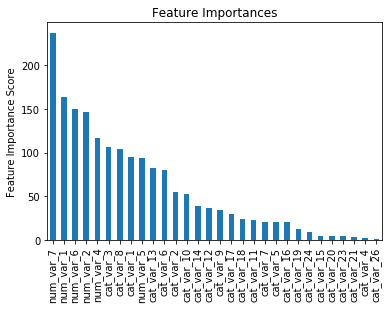

In [20]:
xgb1 = XGBClassifier(
 learning_rate =0.3,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [22]:
range(3,10,2)

[3, 5, 7, 9]

In [23]:
range(1,6,2)

[1, 3, 5]

In [21]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=119, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False,verbose=2,cv=2)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] max_depth=3, min_child_weight=1 .................................
[CV] max_depth=3, min_child_weight=1 .................................
[CV] max_depth=3, min_child_weight=3 .................................
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ........................ max_depth=3, min_child_weight=1 - 1.1min
[CV] max_depth=3, min_child_weight=5 .................................
[CV] ........................ max_depth=3, min_child_weight=1 - 1.1min
[CV] max_depth=3, min_child_weight=5 .................................
[CV] ........................ max_depth=3, min_child_weight=3 - 1.1min
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ........................ max_depth=3, min_child_weight=3 - 1.0min
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ........................ max_depth=3, min_child_weight=5 - 1.0min
[CV] ...........

[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed: 12.1min finished


([mean: 0.72593, std: 0.00088, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.72513, std: 0.00092, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.72620, std: 0.00110, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.72689, std: 0.00120, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.72674, std: 0.00057, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.72625, std: 0.00127, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.72363, std: 0.00082, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.72358, std: 0.00089, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.72371, std: 0.00009, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.72163, std: 0.00016, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.72300, std: 0.00038, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.72266, std: 0.00017, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [24]:
param_test2 = {
 'min_child_weight':[2,4],
    'max_depth':[4,6],
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=148, max_depth=9,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=2,verbose=2)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] max_depth=4, min_child_weight=2 .................................
[CV] max_depth=4, min_child_weight=2 .................................
[CV] max_depth=4, min_child_weight=4 .................................
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ........................ max_depth=4, min_child_weight=2 - 1.9min
[CV] max_depth=6, min_child_weight=2 .................................
[CV] ........................ max_depth=4, min_child_weight=4 - 1.9min
[CV] max_depth=6, min_child_weight=2 .................................
[CV] ........................ max_depth=4, min_child_weight=4 - 1.9min
[CV] ........................ max_depth=4, min_child_weight=2 - 1.9min
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] ........................ max_depth=6, min_child_weight=2 - 2.8min
[CV] .............

[Parallel(n_jobs=4)]: Done   6 out of   8 | elapsed:  4.7min remaining:  1.6min
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:  4.7min finished


([mean: 0.72521, std: 0.00033, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.72569, std: 0.00039, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.72643, std: 0.00035, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.72680, std: 0.00028, params: {'max_depth': 6, 'min_child_weight': 4}],
 {'max_depth': 6, 'min_child_weight': 4},
 0.7268026305305864)

In [ ]:
### 'max_depth': 5, 'min_child_weight': 1

In [25]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=119, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=2,verbose=2)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_


Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] gamma=0.0 .......................................................
[CV] gamma=0.0 .......................................................
[CV] gamma=0.1 .......................................................
[CV] gamma=0.1 .......................................................
[CV] .............................................. gamma=0.0 - 1.6min
[CV] gamma=0.2 .......................................................
[CV] .............................................. gamma=0.0 - 1.6min
[CV] .............................................. gamma=0.1 - 1.6min
[CV] gamma=0.2 .......................................................
[CV] .............................................. gamma=0.1 - 1.6min
[CV] gamma=0.3 .......................................................
[CV] gamma=0.3 .......................................................
[CV] .............................................. gamma=0.2 - 1.6min
[CV] ............

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  4.1min finished


([mean: 0.72689, std: 0.00120, params: {'gamma': 0.0},
  mean: 0.72673, std: 0.00087, params: {'gamma': 0.1},
  mean: 0.72669, std: 0.00070, params: {'gamma': 0.2},
  mean: 0.72652, std: 0.00007, params: {'gamma': 0.3},
  mean: 0.72605, std: 0.00014, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.7268932502511747)

In [ ]:
#gamma==0.0

[0]	train-auc:0.70148+0.0037185	test-auc:0.699184+0.0029125
[1]	train-auc:0.70787+0.0028355	test-auc:0.706373+0.001539
[2]	train-auc:0.71446+0.0028955	test-auc:0.711512+0.0006195
[3]	train-auc:0.719289+0.003388	test-auc:0.716731+0.000578
[4]	train-auc:0.721213+0.002546	test-auc:0.718093+0.000387
[5]	train-auc:0.722477+0.0024045	test-auc:0.718741+0.001048
[6]	train-auc:0.723565+0.002535	test-auc:0.719565+0.0010785
[7]	train-auc:0.725006+0.002997	test-auc:0.720838+0.00098
[8]	train-auc:0.72654+0.0028335	test-auc:0.722519+0.000699
[9]	train-auc:0.72774+0.002977	test-auc:0.72327+0.0009525
[10]	train-auc:0.728914+0.002798	test-auc:0.724279+0.000532
[11]	train-auc:0.729311+0.002823	test-auc:0.724171+0.000878
[12]	train-auc:0.73091+0.004073	test-auc:0.724384+0.0006925
[13]	train-auc:0.732268+0.0031465	test-auc:0.724811+0.0008825
[14]	train-auc:0.732816+0.003135	test-auc:0.725436+0.000824
[15]	train-auc:0.733708+0.003362	test-auc:0.72543+0.001081
[16]	train-auc:0.734125+0.0032165	test-auc:0.72

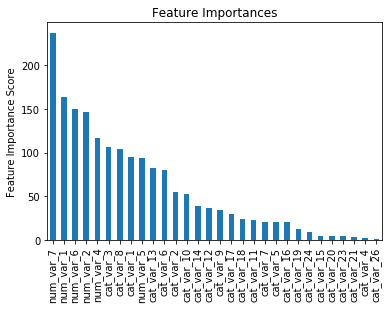

In [26]:
xgb2 = XGBClassifier(
 learning_rate =0.3,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

In [ ]:
cross_val_score()

In [27]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=119, max_depth=5,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=2,verbose=2)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_


Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] subsample=0.6, colsample_bytree=0.6 .............................
[CV] subsample=0.6, colsample_bytree=0.6 .............................
[CV] subsample=0.7, colsample_bytree=0.6 .............................
[CV] subsample=0.7, colsample_bytree=0.6 .............................
[CV] .................... subsample=0.7, colsample_bytree=0.6 - 1.5min
[CV] .................... subsample=0.6, colsample_bytree=0.6 - 1.5min
[CV] .................... subsample=0.6, colsample_bytree=0.6 - 1.5min
[CV] .................... subsample=0.7, colsample_bytree=0.6 - 1.5min
[CV] subsample=0.8, colsample_bytree=0.6 .............................
[CV] subsample=0.8, colsample_bytree=0.6 .............................
[CV] subsample=0.9, colsample_bytree=0.6 .............................
[CV] subsample=0.9, colsample_bytree=0.6 .............................
[CV] .................... subsample=0.9, colsample_bytree=0.6 - 1.2min
[CV] ...........

[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed: 13.0min finished


([mean: 0.72519, std: 0.00075, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.72454, std: 0.00089, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.72668, std: 0.00140, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.72613, std: 0.00087, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.72480, std: 0.00047, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.72497, std: 0.00109, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.72376, std: 0.00139, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.72669, std: 0.00024, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.72439, std: 0.00077, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.72326, std: 0.00032, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.72689, std: 0.00120, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.72461, std: 0.00099, params: {'subsample': 0.9, 'colsample_bytree'

In [ ]:
## colsample_bytree-0.8,subsample:0.8

In [28]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=119, max_depth=5,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=2,verbose=2)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=0.01 ..................................................
[CV] reg_alpha=0.01 ..................................................
[CV] ......................................... reg_alpha=0.01 - 1.5min
[CV] ........................................ reg_alpha=1e-05 - 1.5min
[CV] ......................................... reg_alpha=0.01 - 1.5min
[CV] ........................................ reg_alpha=1e-05 - 1.5min
[CV] reg_alpha=0.1 ...................................................
[CV] reg_alpha=0.1 ...................................................
[CV] reg_alpha=1 .....................................................
[CV] reg_alpha=1 .....................................................
[CV] .......................................... reg_alpha=0.1 - 1.5min
[CV] reg_alpha=10

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  3.8min finished


([mean: 0.72689, std: 0.00120, params: {'reg_alpha': 1e-05},
  mean: 0.72607, std: 0.00031, params: {'reg_alpha': 0.01},
  mean: 0.72498, std: 0.00095, params: {'reg_alpha': 0.1},
  mean: 0.72666, std: 0.00032, params: {'reg_alpha': 1},
  mean: 0.72429, std: 0.00102, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.7268932651083027)

In [37]:
# param_test6 = {
# }
# gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=480, max_depth=9,
#  min_child_weight=7, gamma=0.1, subsample=0.9, colsample_bytree=0.7,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=2,verbose=2)
# gsearch6.fit(train[predictors],train[target])
# gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV]  ................................................................
[CV]  ................................................................
[CV] .......................................................  - 5.6min
[CV] .......................................................  - 5.6min


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:  5.6min finished


([mean: 0.72758, std: 0.00099, params: {}], {}, 0.727580921949334)

In [33]:
#reg_alpha--1e-05


[0]	train-auc:0.70148+0.0037185	test-auc:0.699184+0.0029125
[1]	train-auc:0.70787+0.0028355	test-auc:0.706373+0.001539
[2]	train-auc:0.71446+0.0028955	test-auc:0.711512+0.0006195
[3]	train-auc:0.719289+0.003388	test-auc:0.716731+0.000578
[4]	train-auc:0.721213+0.002546	test-auc:0.718093+0.000387
[5]	train-auc:0.722477+0.0024045	test-auc:0.718741+0.001048
[6]	train-auc:0.723565+0.002535	test-auc:0.719565+0.0010785
[7]	train-auc:0.725006+0.002997	test-auc:0.720838+0.00098
[8]	train-auc:0.72654+0.0028335	test-auc:0.722519+0.000699
[9]	train-auc:0.72774+0.002977	test-auc:0.72327+0.0009525
[10]	train-auc:0.728914+0.002798	test-auc:0.724279+0.000532
[11]	train-auc:0.729311+0.002823	test-auc:0.724171+0.000878
[12]	train-auc:0.73091+0.004073	test-auc:0.724384+0.0006925
[13]	train-auc:0.732268+0.0031465	test-auc:0.724811+0.0008825
[14]	train-auc:0.732816+0.003135	test-auc:0.725436+0.000824
[15]	train-auc:0.733708+0.003362	test-auc:0.72543+0.001081
[16]	train-auc:0.734125+0.0032165	test-auc:0.72

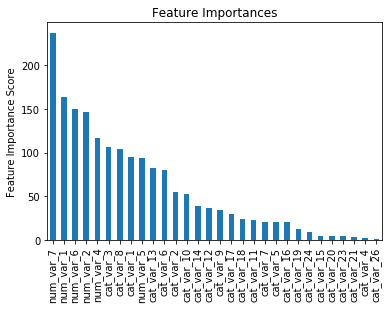

In [29]:
xgb3 = XGBClassifier(
 learning_rate =0.3,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=1e-05,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)

In [39]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_2,cat_var_4,cat_var_5,cat_var_7,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_20,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_25,cat_var_26,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_31,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,3,0,1,3,4,3,3,1,19,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,48,1,0,3,2,15,3,3,14,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,3,1,0,3,2,12,0,4,16,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,3,0,0,3,1,5,3,1,3,11,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,48,1,0,3,1,20,2,3,14,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
clf=XGBClassifier( learning_rate =0.3, n_estimators=89, max_depth=9,
 min_child_weight=7, gamma=0.1, subsample=0.9, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [30]:
def run(X,y,test,params):
    dtrain=xgb.DMatrix(X,label=y)
    dtest=xgb.DMatrix(test)
    bst=xgb.train(params,dtrain,89)
    preds=bst.predict(dtest)
    return bst,preds

params={
    'objective':'binary:logistic',
    'eta':0.3,
    'max_depth':5,
    'min_child_weight':1,
    'gamma':0.0,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'scale_pos_weight':1
    
}

In [44]:
def run2(X,y,test,params2):
    dtrain=xgb.DMatrix(X,label=y)
    dtest=xgb.DMatrix(test)
    bst=xgb.train(params2,dtrain,89)
    preds=bst.predict(dtest)
    return bst,preds

params2={
    'objective':'binary:logistic',
    'eta':0.1,
    'max_depth':9,
    'min_child_weight':7,
    'gamma':0.1,
    'subsample':1,
    'colsample_bytree':0.7,
    'scale_pos_weight':1
    
}

In [31]:
bst,p1=run(train[predictors].values,train[target].values,test[predictors].values,params)

In [61]:
clf.fit(train[predictors].values,train[target].values)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0.1, learning_rate=0.3, max_delta_step=0, max_depth=9,
       min_child_weight=7, missing=None, n_estimators=89, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9)

In [62]:
p1=clf.predict_proba(test[predictors].values)

In [63]:
p1=p1[:,1]

In [32]:
p1

array([ 0.05946037,  0.05909675,  0.0616676 , ...,  0.06347816,
        0.0645609 ,  0.13721821], dtype=float32)

In [96]:
f=0.33333*p1+0.33333*one['target']+0.33333*second['target']

In [109]:
bag.fit(train[predictors].values,train[target].values)
p1=bag.predict_proba(test[predictors].values)
p1=p1[:,1]

In [33]:
subs=pd.DataFrame({
    'transaction_id':test['transaction_id'],
    'target':p1
},columns=['transaction_id','target'])

In [34]:
subs.to_csv('/Users/shashank/Downloads/Societe2/subs19fresh.csv',index=False)

In [127]:
# one=pd.read_csv('/Users/shashank/Downloads/Societe2/subs8.csv')
second=pd.read_csv('/Users/shashank/Downloads/Societe2/subs10fresh.csv')

In [40]:
train.columns[49]

'cat_var_42'

In [60]:
s1=pd.read_csv('/Users/shashank/Downloads/Societe2/subs8.csv')
s2=pd.read_csv('/Users/shashank/Downloads/Societe2/subs8fresh.csv')
s3=pd.read_csv('/Users/shashank/Downloads/Societe2/subs9fresh.csv')
s4=pd.read_csv('/Users/shashank/Downloads/Societe2/subs10fresh.csv')
s5=pd.read_csv('/Users/shashank/Downloads/Societe2/subs11fresh.csv')

In [62]:
pearsonr(s5['target'],s1['target'])

(0.98341488914838182, 0.0)

In [57]:
pearsonr(s1['target'],s2['target'])

(0.97977692551552786, 0.0)

In [59]:
pearsonr(s3['target'],s4['target'])

(0.97150357174572122, 0.0)

In [55]:
# for i in range(8,50):
#     col=train.columns[i]
#     df=train.drop([col],axis=1)
#     predictors = [x for x in df.columns if x not in [target, IDcol]]
#     bst,preds=run2(train[predictors].values,train[target].values,test[predictors].values,params2)
#     subs.to_csv('/Users/shashank/Downloads/Societe2/subs%ddeleted.csv'%i,index=False)
#     print str(i),' completed'


In [ ]:
##All fresh as suffix
###5--0.73098
###6--0.72065
###7--0.71739
###8--0.73141
###9 avg of subs8.csv and prev 8---0.73213
##10 with all features ---0.73218 you dumbass everyone were doing this and you fucking complicated the whole thing!!!
##11 avg of 9 and 10 ---0.73265
###12 avg of 11 subs8.csv and subs10fresh.csv--0.73254 ofc they are avg's of avg's what did you expect?
###13 same as 10fresh but with 150 trees(why not!!)---0.73079 hahaha!!
###14 bag of xgbs with same params and all features --0.72930 rock bottom? NO!!!
###15 basic xgb with all features and 0.3 eta ---0.72930?
## 16 all the time reg alpha was missing (how pathetic!)---0.72743
## 17 all the time max_scale_pos was missing too(can it be more pathetic?)--0.73218 literally made no diff -_-
## 18 subsample 1 (just to check if the hypertuning worked)--0.73102 it worked omg!!!
## but how can I reach 0.738?? sob sob, go sleep now

## 19 eta 0.3 hypertuned --0.73014


In [73]:
348978-320246

28732

In [78]:
311610-283666

27944

In [82]:
37368-36580

788

In [108]:
one=train[train[target]==1].iloc[:,1:-1]

In [110]:
one

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_20,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_25,cat_var_26,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_31,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42
11,2.296053e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,4.610576e-07,128,3,403,1,1,511,3,58,3,12,0,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,3.947368e-09,0.083113,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.911780e-09,128,3,295,1,1,511,3,58,0,7,3,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,4.167763e-06,0.159776,0.0,2.105000e-06,2.769737e-07,4.173684e-06,2.922793e-06,66,48,327,1,0,148,3,0,3,21,2,3,14,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,3.598684e-07,0.089140,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.742906e-07,128,3,0,1,1,511,3,58,2,12,0,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,4.013158e-07,0.578936,0.0,8.930000e-06,1.129605e-06,4.013158e-07,1.943643e-07,251,3,397,0,0,478,3,205,0,12,0,3,32,9,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,6.810526e-06,0.139579,0.0,1.679000e-05,2.197368e-06,8.750000e-06,1.050842e-06,497,24,149,0,0,333,3,426,1,11,4,2,36,10,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,6.862500e-06,0.138945,0.0,1.679000e-05,2.197368e-06,1.124605e-05,1.461874e-06,497,24,287,0,0,333,3,426,3,17,4,2,36,10,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61,2.631579e-09,0.082479,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.274520e-09,128,3,397,1,1,511,3,58,2,7,3,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,2.171053e-07,0.150894,0.0,2.105000e-06,2.769737e-07,2.171053e-07,3.613264e-07,66,48,514,1,0,148,3,0,3,18,1,3,14,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,1.057895e-06,0.141800,0.0,1.679000e-05,2.197368e-06,1.057895e-06,2.987475e-06,497,24,24,0,0,333,3,426,1,5,3,2,36,10,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
(train.iloc[:,1:-1]==one[one.duplicated()].iloc[1,:]).all(axis=1).sum()

299

In [125]:
(one==one[one.duplicated()].iloc[1,:]).all(axis=1).sum()

15

In [130]:
(test.iloc[:,1:]==one[one.duplicated()].iloc[5,:]).all(axis=1).sum()

0

In [123]:
test.iloc[:,1:]

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_20,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_25,cat_var_26,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_31,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42
0,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,66,50,158,1,0,149,4,53,3,13,0,3,14,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,323,3,0,0,1,284,4,166,4,4,1,0,10,2,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,66,50,404,1,0,149,4,53,0,21,2,3,14,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,323,3,117,0,1,269,4,166,2,9,4,0,10,2,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,127,3,0,1,1,509,4,60,3,12,0,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,8.572368e-07,0.582214,0.0,7.680000e-06,2.631579e-07,1.485526e-06,2.048791e-07,14,3,129,0,1,280,4,283,1,22,2,2,40,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.578947e-07,0.293751,0.0,5.865000e-06,6.355263e-07,1.578947e-07,7.647119e-08,475,3,398,0,0,367,4,7,4,2,2,2,28,6,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1.348684e-07,0.162737,0.0,2.105000e-06,2.769737e-07,1.348684e-07,9.558899e-08,66,50,567,1,0,149,4,53,3,13,0,3,14,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9.361842e-07,0.494026,0.0,2.890000e-06,3.407895e-07,3.730263e-07,7.647119e-09,314,3,415,0,0,89,4,73,2,16,3,4,24,3,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,5.263158e-09,0.078355,0.0,3.550000e-07,4.671053e-08,4.407895e-08,4.938765e-08,127,3,203,1,1,509,4,60,1,17,4,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
one[one.duplicated()]

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_20,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_25,cat_var_26,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_31,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
7540,1.118421e-08,0.089140,0.0,3.550000e-07,4.671053e-08,4.407895e-08,5.416710e-09,128,3,397,1,1,511,3,58,2,12,0,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13555,5.921053e-09,0.078672,0.0,3.550000e-07,4.671053e-08,4.407895e-08,2.867670e-09,128,3,397,1,1,511,3,58,0,17,4,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16193,1.644737e-08,0.089035,0.0,3.550000e-07,4.671053e-08,4.407895e-08,7.965749e-09,128,3,397,1,1,511,3,58,0,19,0,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16730,1.315789e-08,0.085016,0.0,3.550000e-07,4.671053e-08,4.407895e-08,6.372599e-09,128,3,397,1,1,511,3,58,1,21,2,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19032,1.315789e-08,0.085016,0.0,3.550000e-07,4.671053e-08,4.407895e-08,6.372599e-09,128,3,397,1,1,511,3,58,1,21,2,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20752,2.302632e-08,0.079095,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.115205e-08,128,3,397,1,1,511,3,58,1,11,4,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23419,1.250000e-08,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,6.053969e-09,128,3,397,1,1,511,3,58,3,12,0,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23635,6.578947e-09,0.089035,0.0,3.550000e-07,4.671053e-08,4.407895e-08,3.186300e-09,128,3,397,1,1,511,3,58,0,19,0,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24710,6.578947e-09,0.085439,0.0,3.550000e-07,4.671053e-08,4.407895e-08,3.186300e-09,128,3,397,1,1,511,3,58,2,20,2,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25139,6.578947e-09,0.078778,0.0,3.550000e-07,4.671053e-08,4.407895e-08,3.186300e-09,128,3,397,1,1,511,3,58,2,11,4,4,16,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [135]:
train[predictors].columns[-18:]

Index([u'cat_var_25', u'cat_var_26', u'cat_var_27', u'cat_var_28',
       u'cat_var_29', u'cat_var_30', u'cat_var_31', u'cat_var_32',
       u'cat_var_33', u'cat_var_34', u'cat_var_35', u'cat_var_36',
       u'cat_var_37', u'cat_var_38', u'cat_var_39', u'cat_var_40',
       u'cat_var_41', u'cat_var_42'],
      dtype='object')

In [151]:
a=train.loc[:,list(train[predictors].columns[-19:])].values

In [164]:
b=test.loc[:,list(test[predictors].columns[-19:])].values

In [153]:
l=[ np.where(r==1)[0][0] for r in a ]

In [166]:
l1=[ np.where(r==1)[0][0] for r in b ]

In [154]:
pd.Series(l).value_counts()

0     348663
2        193
1         43
6         41
5         19
4          9
15         3
9          2
8          2
17         1
10         1
3          1
dtype: int64

In [167]:
pd.Series(l1).value_counts()

0     522995
2        306
1         53
6         40
5         32
4         12
8          5
9          4
15         3
11         3
10         3
7          3
3          3
16         2
13         1
12         1
dtype: int64

In [155]:
train['ints1']=pd.Series(l)

In [161]:
col=list(train[predictors].columns[-19:])

In [162]:
train.drop(col,axis=1,inplace=True)

In [158]:
train.loc[:,'cat_var_24':'cat_var_42']

,cat_var_24,cat_var_25,cat_var_26,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_31,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
